In [1]:
%matplotlib inline
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# 9.1.5 Getting started with SQLAlchemy

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

# 9.2.1 Retrieve the Precipitation Data

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

# 9.2.2 Save Query Results

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

# 9.2.3 Sort the DataFrame

In [12]:
# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

# 9.2.4 Plot the Data

<IPython.core.display.Javascript object>


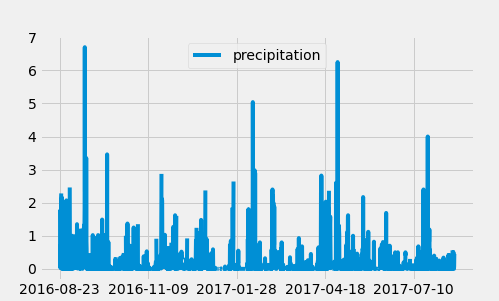

<AxesSubplot:xlabel='date'>

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

# 9.2.5 Generate the Summary

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge